Epoch 0: Train Loss = 0.6931, Val Loss = 0.6517
Epoch 100: Train Loss = 0.0946, Val Loss = 0.0876
Epoch 200: Train Loss = 0.0569, Val Loss = 0.0513
Epoch 300: Train Loss = 0.0428, Val Loss = 0.0377
Epoch 400: Train Loss = 0.0352, Val Loss = 0.0304
Epoch 500: Train Loss = 0.0304, Val Loss = 0.0259
Epoch 600: Train Loss = 0.0270, Val Loss = 0.0227
Epoch 700: Train Loss = 0.0245, Val Loss = 0.0204
Epoch 800: Train Loss = 0.0225, Val Loss = 0.0187
Epoch 900: Train Loss = 0.0209, Val Loss = 0.0173


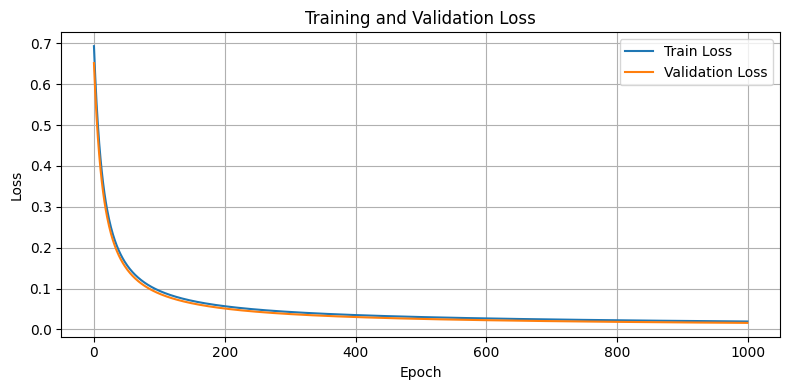

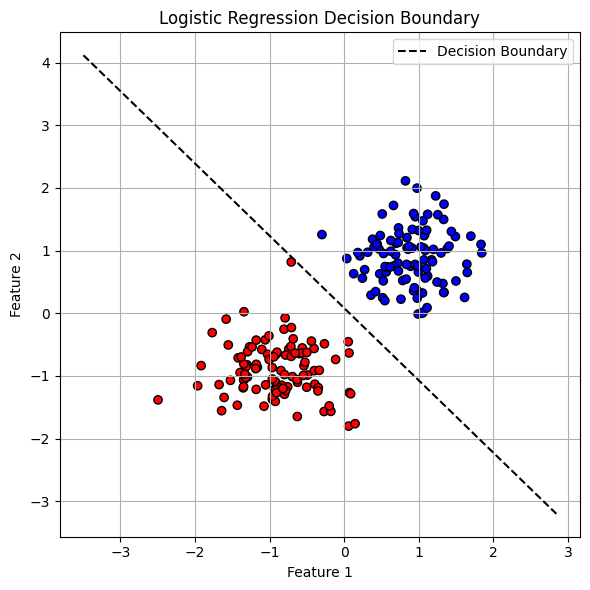


✅ Test Accuracy: 100.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Generate Synthetic Binary Classification Data ---
np.random.seed(42)

def create_data():
    X0 = np.random.randn(100, 2) + 2
    y0 = np.zeros((100, 1))
    X1 = np.random.randn(100, 2) - 2
    y1 = np.ones((100, 1))

    X = np.vstack((X0, X1))
    y = np.vstack((y0, y1))

    # Normalize features
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    return X, y

X, y = create_data()

# --- Step 2: Split into Train / Validation / Test ---
n = X.shape[0]
indices = np.random.permutation(n)
X, y = X[indices], y[indices]

n_train = int(n * 0.6)
n_val = int(n * 0.2)

X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

# --- Step 3: Define Sigmoid and Loss Function ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# --- Step 4: Train the Logistic Regression Model ---
def train(X_train, y_train, X_val, y_val, lr=0.1, epochs=1000):
    n_samples, n_features = X_train.shape
    weights = np.zeros((n_features, 1))
    bias = 0.0

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X_train, weights) + bias
        y_pred = sigmoid(z)
        train_loss = binary_cross_entropy(y_train, y_pred)

        # Gradients
        dw = np.dot(X_train.T, (y_pred - y_train)) / n_samples
        db = np.mean(y_pred - y_train)

        # Update parameters
        weights -= lr * dw
        bias -= lr * db

        # Validation
        z_val = np.dot(X_val, weights) + bias
        y_val_pred = sigmoid(z_val)
        val_loss = binary_cross_entropy(y_val, y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return weights, bias, train_losses, val_losses

# --- Step 5: Predict Function ---
def predict(X, weights, bias):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= 0.5).astype(int)

# --- Step 6: Train Model ---
weights, bias, train_losses, val_losses = train(X_train, y_train, X_val, y_val)

# --- Step 7: Plot Loss Curve ---
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 8: Plot Decision Boundary ---
def plot_decision_boundary(X, y, weights, bias):
    x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2_vals = -(bias + weights[0] * x1_vals) / weights[1]

    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolor='k')
    plt.plot(x1_vals, x2_vals, 'k--', label="Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X, y, weights, bias)

# --- Step 9: Evaluate on Test Set ---
y_test_pred = predict(X_test, weights, bias)
test_acc = np.mean(y_test_pred == y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
